Christiaan van Roon - 11122854
Sander Hansen - 10995080

# Linear Regression
In the file housesRegr.csv you find the data that Andrew Ng uses in his example for the regression of house prizes. In the file are the columns MLS, Bedrooms, Bathrooms, Size and Price. MLS is an index in the database and of no use to us.

## Univariate Linear Regression
Write a function for univariate linear regression using the hypotheses $h_\theta(x) = \theta_0 + \theta_1 x$. Use this to find the regression for the Price as a function of Bedrooms, Price as a function of Bathrooms and Price as a function of Size. So three regression functions! Plot these regressions functions and also plot the learning examples on which it is based.

Linear regression has to be done using gradient descent. Make sure your report shows how many iterations were done.

You may choose yourself if you write an explicit loop over all learning examples or whether you collect all learning examples into one data array.



In [1]:
#Pylab inline is not a good habit to use
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

Read in data from csv file

In [2]:

#Split the csv data
data = mlab.csv2rec('housesRegr.csv', delimiter = ';')

bedrooms = array(data['bedrooms'])
bathrooms = array(data['bathrooms'])
price = array(data['price'])
size = array(data['size']) / 100

Error function and gradient descent 

In [3]:
#Error function
def f_1(t_0, t_1, x):
    return t_0 + t_1 * x

#Univariate Gradient descent
def gradient_descent(init_t0, init_t1, alpha, x_array, y_array, i):
    t_0 = init_t0
    t_1 = init_t1
    m = x_array.size
    for _ in range(i):
        
        temp_0 = t_0 - sum((f_1(t_0, t_1, x_array) - y_array) * (alpha / m))
        temp_1 = t_1 - sum((f_1(t_0, t_1, x_array) - y_array) * x_array * (alpha / m))
        t_0 = temp_0
        t_1 = temp_1
    return t_0, t_1

Run and plot the outcome of the experiment

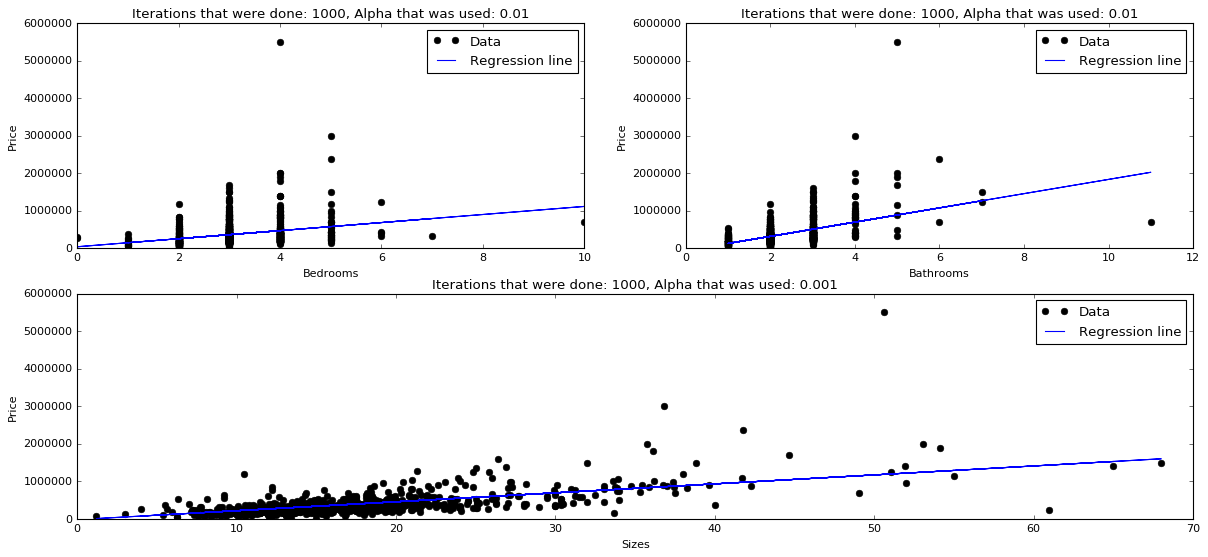

In [4]:

#Just simply plot all the results we got

fig = pyplot.figure(figsize=(18, 8), dpi=80, facecolor='white')
it = 1000

subplot(2,2,1)
t_0, t_1 = gradient_descent(0, 100, 0.01, bedrooms, price, it)
result = [f_1(t_0, t_1, x) for x in bedrooms]
plot(bedrooms, price, 'o', color='black', label = 'Data')
plot(bedrooms, result, label = 'Regression line')
xlabel('Bedrooms')
ylabel('Price')
title('Iterations that were done: ' + str(it) + ', Alpha that was used: 0.01')
legend(loc='upper right')

subplot(2,2,2)
t_0, t_1 = gradient_descent(0, 100, 0.01, bathrooms, price, it)
result = [f_1(t_0, t_1, x) for x in bathrooms]
plot(bathrooms, price, 'o', color='black', label = 'Data')
plot(bathrooms, result, label = 'Regression line')
xlabel('Bathrooms')
ylabel('Price')
legend
title('Iterations that were done: ' + str(it) + ', Alpha that was used: 0.01')
legend(loc='upper right')

subplot(2,1,2)
t_0, t_1 = gradient_descent(0, 300, 0.001, size, price, it)
result = [f_1(t_0, t_1, x) for x in size]
plot(size, price, 'o', color='black', label = 'Data')
plot(size, result, label = 'Regression line')
xlabel('Sizes')
ylabel('Price')
title('Iterations that were done: ' + str(it) + ', Alpha that was used: 0.001')
legend(loc='upper right')
show()

## Multivariate Linear Regression

Write a function for multivariate linear regression using the hypothesis
$$ h_\theta(x_1, x_2, x_3) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 $$

where $x_1$ is the number of bedrooms, $x_2$ is the number of
bathrooms and $x_3$ is the size.

For this case you have to randomly divide your learning set in 70%
training set and 30% test set. As a test you should report the
standard deviation of hypothesized house price and real house price.

Linear regression has to be done using gradient descent. Make sure
your report shows how many iterations were done.

You may choose yourself if you write an explicit loop over all
learning examples or whether you collect all learning examples into
one data array.

In [5]:
#Error function
def f_2(t_0, t_1, t_2, t_3, x1, x2, x3):
    return t_0 + (t_1 * x1) + (t_2 * x2) + (t_3 * x3)


#Multivariate gradient descent
def gradient_descent_multi(alpha, x1, x2, x3, y_array, i):
    t_0 = 1
    t_1 = 1
    t_2 = 1
    t_3 = 1
    
    for _ in range(i):
        temp_0 = t_0 - sum((f_2(t_0, t_1, t_2, t_3, x1, x2, x3) - y_array) * (alpha / x1.size))
        temp_1 = t_1 - sum((f_2(t_0, t_1, t_2, t_3, x1, x2, x3) - y_array) * (alpha / x1.size) * x1)
        temp_2 = t_2 - sum((f_2(t_0, t_1, t_2, t_3, x1, x2, x3) - y_array) * (alpha / x2.size) * x2)
        temp_3 = t_3 - sum((f_2(t_0, t_1, t_2, t_3, x1, x2, x3) - y_array) * (alpha / x3.size) * x3)
        t_0 = temp_0
        t_1 = temp_1
        t_2 = temp_2
        t_3 = temp_3
    return t_0, t_1, t_2, t_3

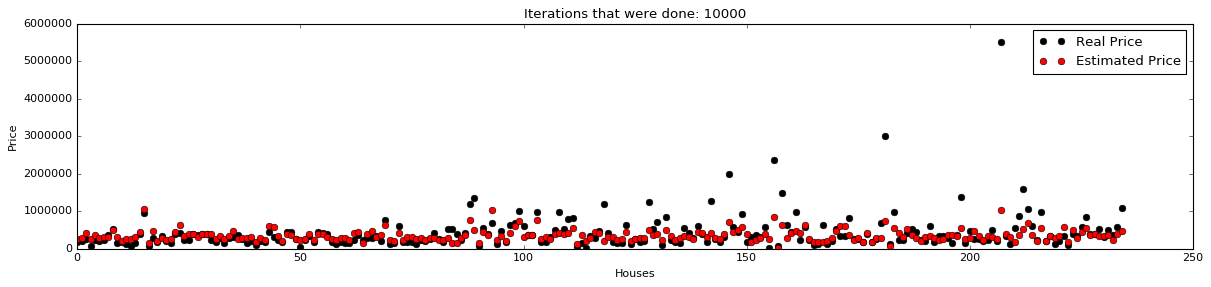

Standard Deviation of fit: 153170.450486
Standard Deviation of real data: 495947.864448
You can adjust alpha to get a different standard deviation


In [6]:
fig = pyplot.figure(figsize=(18, 8), dpi=80, facecolor='white')
it = 10000

#We need 70% train data
train_size = int(0.7 * bedrooms.size)
test_bed = bedrooms[train_size:]
test_bath = bathrooms[train_size:]
test_size = size[train_size:]
test_price = price[train_size:]


# Train data
subplot(2,1,1)
t_0, t_1, t_2, t_3 = gradient_descent_multi(0.000001, bedrooms[:train_size], bathrooms[:train_size], size[:train_size], price[:train_size], it)
result = [f_2(t_0, t_1, t_2, t_3, test_bed[i], test_bath[i], test_size[i]) for i in range(0, len(test_bed))]

# Plot the results
plot(range(0, len(test_bed)), test_price, 'o', color='black', label='Real Price')
plot(range(0, len(test_bed)), result, 'o', color='red', label='Estimated Price')
xlabel('Houses')
ylabel('Price')
legend(loc='upper right')
title('Iterations that were done: ' + str(it))
show()

stddev1 = sqrt(mean((result - mean(result)) ** 2))
stddev2 = sqrt(mean((test_price - mean(test_price)) ** 2))

print('Standard Deviation of fit: ' + str(stddev1))
print('Standard Deviation of real data: ' + str(stddev2))
print('You can adjust alpha to get a different standard deviation')